### Importación de librerias

In [2]:
#!pip install xarray netCDF4 numpy pandas


In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Importación de los dataset

In [5]:
ds_caldas = xr.open_dataset("ETCaldas.nc")
ds_sierra = xr.open_dataset("ETSierra.nc")

df_ETcaldas = ds_caldas.to_dataframe().reset_index()
df_ETsierra = ds_sierra.to_dataframe().reset_index()

In [6]:
df_ETcaldas

,time,bnds,FLDAS_NOAH01_CP_GL_M_001_Evap_tavg,datamonth,time_bnds
0,2019-01-01,0,0.000048,201901,2019-01-01
1,2019-01-01,1,0.000048,201901,2019-02-01
2,2019-02-01,0,0.000047,201902,2019-02-01
3,2019-02-01,1,0.000047,201902,2019-03-01
4,2019-03-01,0,0.000049,201903,2019-03-01
...,...,...,...,...,...
159,2025-08-01,1,0.000048,202508,2025-09-01
160,2025-09-01,0,0.000046,202509,2025-09-01
161,2025-09-01,1,0.000046,202509,2025-10-01
162,2025-10-01,0,0.000042,202510,2025-10-01


### Limpieza de datos

In [8]:
#Cambiamos el nombre de la variable para un mejor manejo
varname = "FLDAS_NOAH01_CP_GL_M_001_Evap_tavg"
df_ETcaldas = df_ETcaldas.rename(columns={varname: "ET"})
df_ETsierra = df_ETsierra.rename(columns={varname: "ET"})

In [9]:
#convetirmos la variable a mm/mes
def convert_to_mm_monthly(df, variable):
    df['days'] = df['time'].dt.days_in_month
    df['ET_mm'] = df[variable] * 60 * 60 * 24 * df['days']
    return df

df_ETcaldas = convert_to_mm_monthly(df_ETcaldas, "ET")
df_ETsierra = convert_to_mm_monthly(df_ETsierra, "ET")

In [10]:
df_ETcaldas

,time,bnds,ET,datamonth,time_bnds,days,ET_mm
0,2019-01-01,0,0.000048,201901,2019-01-01,31,128.217202
1,2019-01-01,1,0.000048,201901,2019-02-01,31,128.217202
2,2019-02-01,0,0.000047,201902,2019-02-01,28,113.268881
3,2019-02-01,1,0.000047,201902,2019-03-01,28,113.268881
4,2019-03-01,0,0.000049,201903,2019-03-01,31,131.254745
...,...,...,...,...,...,...,...
159,2025-08-01,1,0.000048,202508,2025-09-01,31,129.464208
160,2025-09-01,0,0.000046,202509,2025-09-01,30,119.592304
161,2025-09-01,1,0.000046,202509,2025-10-01,30,119.592304
162,2025-10-01,0,0.000042,202510,2025-10-01,31,111.657277


In [11]:
#Eliminamos las variables 'bnds' y 'time_bnds', ya que no representan información adicional y solo marcan el inicio y el final del mes
df_ETcaldas = df_ETcaldas.drop(columns=['bnds', 'time_bnds'])
df_ETsierra = df_ETsierra.drop(columns=['bnds', 'time_bnds'])

In [12]:
#Creamos una función para hacer un análisis rápido de cada dataset
def quality_report(df, name="Dataset"):
    print(f"\n REPORTE DE CALIDAD: {name}\n")
    print(f"Total de filas: {len(df)}")
    #calculo de duplicados totales
    full_dups = df.duplicated().sum()
    print(f"Filas duplicadas completas: {full_dups}")
    #Calculamos los duplicados de la columna fecha, para validar que no existan más de dos registros para un periodo
    if 'time' in df.columns:
        time_dups = df.duplicated(subset=['time']).sum()
        print(f"Duplicados en la columna 'time': {time_dups}")
    else:
        print("⚠ La columna 'time' no existe en el dataframe.")
    #Nulos por columna
    print("\nValores nulos por columna:")
    print(df.isna().sum())
    #Tipos de datos
    print("\nTipos de datos:")
    print(df.dtypes)
    #Rango de fechas
    if 'time' in df.columns:
        print("\nRango de fechas:")
        print(f"Fecha mínima: {df['time'].min()}")
        print(f"Fecha máxima: {df['time'].max()}")
    else:
        print("\nNo se puede medir el rango de fechas (falta columna time).")
    #Estadísticas básicas de ET
    if 'ET' in df.columns:
        print("\nEstadísticas de la variable ET:")
        print(df['ET_mm'].describe())
    else:
        print("\n⚠ La columna no existe.")


In [13]:
quality_report(df_ETcaldas, name="ET Caldas")



 REPORTE DE CALIDAD: ET Caldas

Total de filas: 164
Filas duplicadas completas: 82
Duplicados en la columna 'time': 82

Valores nulos por columna:
time         0
ET           0
datamonth    0
days         0
ET_mm        0
dtype: int64

Tipos de datos:
time         datetime64[ns]
ET                  float32
datamonth             int32
days                  int32
ET_mm               float64
dtype: object

Rango de fechas:
Fecha mínima: 2019-01-01 00:00:00
Fecha máxima: 2025-10-01 00:00:00

Estadísticas de la variable ET:
count    164.000000
mean     119.486938
std       11.016650
min       92.511513
25%      112.354364
50%      120.028845
75%      128.350139
max      138.610082
Name: ET_mm, dtype: float64


In [14]:
quality_report(df_ETsierra, name="ET Sierra")


 REPORTE DE CALIDAD: ET Sierra

Total de filas: 164
Filas duplicadas completas: 82
Duplicados en la columna 'time': 82

Valores nulos por columna:
time         0
ET           0
datamonth    0
days         0
ET_mm        0
dtype: int64

Tipos de datos:
time         datetime64[ns]
ET                  float32
datamonth             int32
days                  int32
ET_mm               float64
dtype: object

Rango de fechas:
Fecha mínima: 2019-01-01 00:00:00
Fecha máxima: 2025-10-01 00:00:00

Estadísticas de la variable ET:
count    164.000000
mean      91.968947
std       29.333543
min       29.766069
25%       67.294343
50%      101.490868
75%      115.521641
max      135.827646
Name: ET_mm, dtype: float64


In [15]:
#Teniendo en cuenta que no hay variables nulas, eliminamos duplicados
df_ETcaldas = df_ETcaldas.drop_duplicates(subset=['time'])
df_ETsierra = df_ETsierra.drop_duplicates(subset=['time'])

df_ETcaldas.shape


(82, 5)

In [16]:
df_ETsierra.shape

(82, 5)

In [17]:
#Por último eliminamos las columnas que no necesitaremos más adelante, para dejar el dataset más limpio
df_ETcaldas = df_ETcaldas.drop(columns=['datamonth', 'days'])
df_ETsierra = df_ETsierra.drop(columns=['datamonth', 'days'])

df_ETcaldas = df_ETcaldas.sort_values('time').reset_index(drop=True)
df_ETsierra = df_ETsierra.sort_values('time').reset_index(drop=True)


In [18]:
df_ETcaldas.head()
df_ETcaldas.tail()

df_ETsierra.head()
df_ETsierra.tail()


,time,ET,ET_mm
77,2025-06-01,0.000043,110.367944
78,2025-07-01,0.000046,123.828219
79,2025-08-01,0.000048,128.236123
80,2025-09-01,0.000045,116.883094
81,2025-10-01,0.000043,114.774466


In [19]:
df_ETcaldas.isna().sum()
#df_ETsierra.isna().sum()


time     0
ET       0
ET_mm    0
dtype: int64

### Visualización de datos

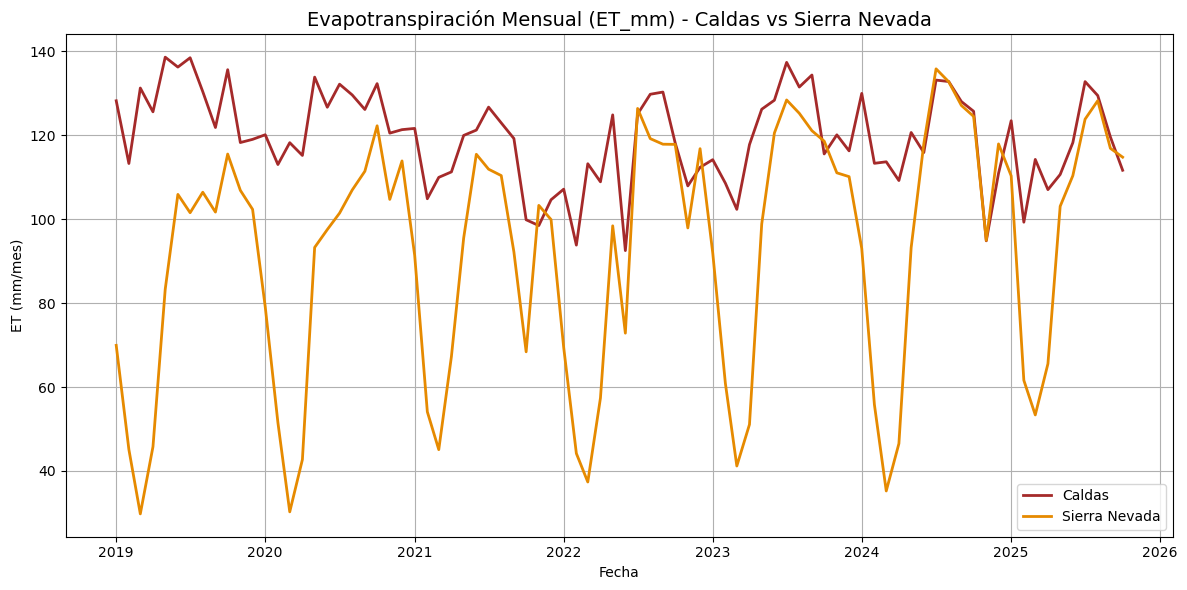

In [21]:
#Comparamos la evapotranspiración mensual de las dos zonas
plt.figure(figsize=(12,6))

plt.plot(df_ETcaldas['time'], df_ETcaldas['ET_mm'], label='Caldas', linewidth=2, color='#A52A2A')
plt.plot(df_ETsierra['time'], df_ETsierra['ET_mm'], label='Sierra Nevada', linewidth=2, color='#E68A00')

plt.title('Evapotranspiración Mensual (ET_mm) - Caldas vs Sierra Nevada', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('ET (mm/mes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
#Identificamos los meses secos y los meses húmedos en Caldas
p25_caldas = df_ETcaldas['ET_mm'].quantile(0.25)
p75_caldas = df_ETcaldas['ET_mm'].quantile(0.75)

df_ETcaldas['clima_mes'] = df_ETcaldas['ET_mm'].apply(
    lambda x: 'Seco' if x < p25_caldas else
              'Húmedo' if x > p75_caldas else
              'Normal'
)

df_ETcaldas[['time','ET_mm','clima_mes']].head(15)



,time,ET_mm,clima_mes
0,2019-01-01,128.217202,Normal
1,2019-02-01,113.268881,Normal
2,2019-03-01,131.254745,Húmedo
3,2019-04-01,125.582457,Normal
4,2019-05-01,138.610082,Húmedo
5,2019-06-01,136.248465,Húmedo
6,2019-07-01,138.470999,Húmedo
7,2019-08-01,130.390326,Húmedo
8,2019-09-01,121.849122,Normal
9,2019-10-01,135.622591,Húmedo


In [23]:
#Identificamos los meses secos y los meses húmedos en la Sierra
p25_sierra = df_ETsierra['ET_mm'].quantile(0.25)
p75_sierra = df_ETsierra['ET_mm'].quantile(0.75)

df_ETsierra['clima_mes'] = df_ETsierra['ET_mm'].apply(
    lambda x: 'Seco' if x < p25_sierra else
              'Húmedo' if x > p75_sierra else
              'Normal'
)

df_ETsierra[['time','ET_mm','clima_mes']].head(15)


,time,ET_mm,clima_mes
0,2019-01-01,69.926548,Normal
1,2019-02-01,45.117358,Seco
2,2019-03-01,29.766069,Seco
3,2019-04-01,45.771368,Seco
4,2019-05-01,83.296321,Normal
5,2019-06-01,105.907967,Normal
6,2019-07-01,101.541012,Normal
7,2019-08-01,106.425723,Normal
8,2019-09-01,101.688609,Normal
9,2019-10-01,115.521641,Húmedo


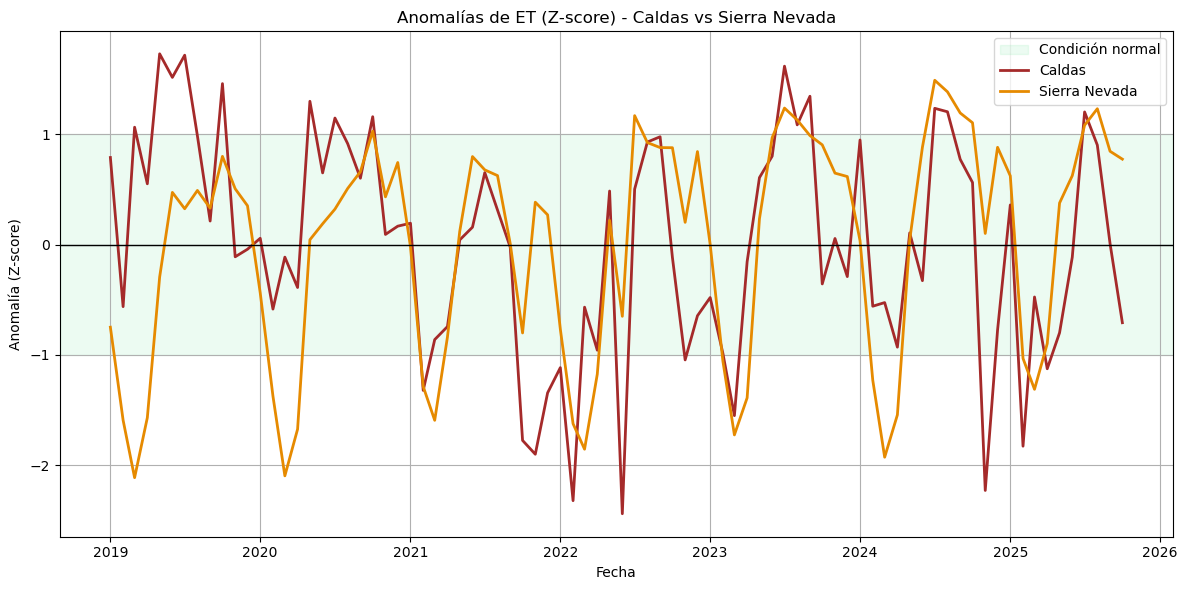

In [24]:
#a partir de lo anterior calculamos los meses con anomalías climáticas
df_ETcaldas['ET_anom'] = (df_ETcaldas['ET_mm'] - df_ETcaldas['ET_mm'].mean()) / df_ETcaldas['ET_mm'].std()
df_ETsierra['ET_anom']  = (df_ETsierra['ET_mm'] - df_ETsierra['ET_mm'].mean()) / df_ETsierra['ET_mm'].std()

plt.figure(figsize=(12,6))
plt.axhspan(-1, 1, color='#4ADE80', alpha=0.10, label='Condición normal')
plt.plot(df_ETcaldas['time'], df_ETcaldas['ET_anom'], label='Caldas', linewidth=2, color='#A52A2A')
plt.plot(df_ETsierra['time'], df_ETsierra['ET_anom'], label='Sierra Nevada', linewidth=2, color='#E68A00')
plt.axhline(0, color='black', linewidth=1)

plt.title('Anomalías de ET (Z-score) - Caldas vs Sierra Nevada')
plt.xlabel('Fecha')
plt.ylabel('Anomalía (Z-score)')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
